# Análisis de plataforma de entregas

## Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que hemos usado tiene modificaciones del original. Está reducido el tamaño del conjunto para realizar los cálculos más rápido y se introdujo valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales cuando se realizaron los cambios.

###  Diccionario de datos

Hay cinco tablas en el conjunto de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Plan de solución

1. Importar las librerías que necesitemos
2. Leer los archivos y ver la información de estos para ver como se conforman
3. Trabajar en los valores duplicados que pueda haber
4. Trabajar en los valores ausentes que pueda haber
5. Realizar conclusiones a partir de lo que podemos observar de los datos

##  Descripción de los datos




In [1]:
# Importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Leer los conjuntos de datos 
instacart_orders= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\instacart_orders.csv", sep=';')
products= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\products.csv", sep=';')
aisles=pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\aisles.csv", sep=';')
departments= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\departments.csv", sep=';')
order_products= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\order_products.csv", sep=';') 

In [3]:
# Mostrar información de Instacart Orders
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# Mostrar información de Products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# Mostrar información de Aisles
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Mostrar información de Departments
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# Mostrar información de Order Products
order_products.info()
print()
print(order_products.head()) #se usa head() ya que se observa que falta no muestra la columna non-null count, por lo que se piensa que el df está vacío, pero se comprueba que si tiene información                             
print()
print(order_products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


### Conclusiones


Al intentar por primera vez leer los datos, observamos que el documento esta separado por `';'`, por lo que se tuvo que agregar a la función de `read_csv()` como `'sep=';'`. 

1. `'instacart_orders'`: podemos observar que la columna `'days_since_prior_order'` tiene información faltante, esto se debe a que si son días desde la última compra, puede variar mucho entre cada cliente, y que si es la primera vez que compran, puede que este vacía la información. La columna de `'order_hour_of_day'` está en tipo int64, habrá que revisar si nos conviene cambiar el tipo datetime y la columna `'days_since_prior_order'` está en float64, habrá que revisar si toman en cuenta decimales o no.
2. `'products'`: observamos que en la columna product_name hace falta información, habrá que ver porque.
3. `'asiles'`: la información a primera vista con `info()` se ve completa, y en un tipo de dato correspondiente.
4. `'departments'`: al igual que el df pasado se ve completa y correcta la información proporcionada por info().
5. `'order_products'`: al imprimir la columna no aparece la información de non-null count, se usa `head()` y el método `isnull()` para revisar el contenido del df.

Se observa que las columnas de `"id"` son las que tienen relación entre los dataframes, estas nos ayudarán a juntar información de ser necesario con el método de `merge()`.

## Preprocesamiento de los datos

### Plan de trabajo

Revisaremos cada dataframe, comenzando por checar los tipos de datos y su formato en el df, ver si coincide con el tipo de dato en el que se guardo. Después los valores duplicados, determinar el porque está duplicado y tomar la decisión si conservar o eliminar los datos. Al final revisaremos los valores ausentes, y se analizará si se pueden completar con el resto o si habrá que eliminarlos dependiendo su importancia en el conjunto. 

### Encontrar y eliminar los valores duplicados 

#### `orders` data frame

In [8]:
# Revisar si hay pedidos duplicados

# Se imprime el número de filas duplicadas
print(instacart_orders['order_id'].duplicated().sum()) 
print()

# Se hace un df filtrado con las filas duplicadas
dup_instacart_orders=instacart_orders[instacart_orders.duplicated()] 

# Se observan las filas duplicadas
print(dup_instacart_orders) 

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

Se observa que todas las filas duplicados tienen registro de el Miércoles a las 2 de la mañana.

In [9]:
# Se imprime una consulta del df donde el día es el miercoles y la hora a las 2, ordenando los valores por user_id para ver los duplicados juntos, e imprimimos los primeros 20 valores para observar como son los duplicados.
instacart_orders.query("order_dow == 3 and order_hour_of_day == 2").sort_values(by='order_id').head(20)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
316583,272079,121263,7,3,2,3.0
210068,284770,137352,7,3,2,8.0
359625,332561,201301,1,3,2,NaN
195093,350018,142887,6,3,2,1.0
29129,353088,46038,4,3,2,11.0


Se puede observar en las ordenes de order id 2125197 y 2845099, están duplicadas las filas completamente, por lo que es mejor borrar las filas completas que están duplicadas.

In [10]:
# Se eliminan los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index()

In [11]:
# Verificamos si hay filas duplicadas
instacart_orders.duplicated().sum()

0

In [12]:
# Volvemos a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders['order_id'].duplicated().sum()

0

Conclusiones

Se observa que las filas duplicadas eran ordenes repetidas, por lo que se podía elimar el duplicado.

#### `products` data frame

In [13]:
# Se revisa si hay filas totalmente duplicadas
print(products.duplicated().sum()) 
print()
products.head()

0



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
# Revisar si hay ID's de departamentos duplicados
products['department_id'].duplicated().sum()

49673

In [15]:
# Revisar únicamente si hay nombres duplicados de productos 

# Se cambian los nombres a mayúsculas
products['product_name'] = products['product_name'].str.upper() 

# Se revisan los primeros 5 nombres para confirmar el cambio
print(products.head()) 
print()
# Se revisa la cantidad de nombres de productos duplicados
print(products['product_name'].duplicated().sum()) 
print()
# Se obtienen los productos duplicados del df
print(products[products['product_name'].duplicated()]) 
print()
# Se suman la cantidad de productos sin nombre
print(products['product_name'].isna().sum()) 
print()
# Se saca la lista de productos sin nombre
print(products[products['product_name'].isna()]) 

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

1361

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436       

In [16]:
# Revisar si hay nombres duplicados de productos no faltantes

# Se guarda una consulta de los productos duplicados que no sean NaN
dup_products= products.query('product_name.notna() and product_name.duplicated(keep=False)') 

# Se imprimen los primeros 20 en orden alfabetico para observar como se duplican
print(dup_products.sort_values(by='product_name').head(20)) 
print()

# Se sacan la lista de los duplicados y su numero de apariciones en el df
print(dup_products['product_name'].value_counts()) 

       product_id                               product_name  aisle_id  \
23339       23340  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
31844       31845  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
19941       19942            AGED BALSAMIC VINEGAR OF MODENA        19   
13152       13153            AGED BALSAMIC VINEGAR OF MODENA        19   
24830       24831         ALBACORE SOLID WHITE TUNA IN WATER        95   
22582       22583         ALBACORE SOLID WHITE TUNA IN WATER        95   
9037         9038                     AMERICAN CHEESE SLICES        21   
515           516                     AMERICAN CHEESE SLICES        21   
49530       49531               ANCHOVY FILLETS IN OLIVE OIL        95   
12325       12326               ANCHOVY FILLETS IN OLIVE OIL        95   
27802       27803                         APRICOT ENERGY BAR         3   
41221       41222                         APRICOT ENERGY BAR         3   
45230       45231                     

Conclusiones

Se encontraron muchas filas donde el producto estaba repetido, y otras donde el producto no tiene nombre, esto último se corregirá más adelante. Las filas repetidas se dejan ya que tienen diferente número de `'product_id'`, por lo que puede ser un diferente producto a la hora de realizar el análisis.

#### `departments` data frame

In [17]:
# Revisar si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [18]:
# Revisar únicamente si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())

0


No se encuentran erroes, por lo que se deja igual.

#### `aisles` data frame

In [19]:
# Revisar si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [20]:
# Revisar únicamente si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())

0


No se encuentran erroes, por lo que se deja igual.

#### `order_products` data frame

In [21]:
# Revisar si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [22]:
# Volver a verificar si hay cualquier otro duplicado engañoso
cols= [order_products.columns]

for col in cols:
    print(order_products[col].duplicated().sum())

0


No se encuentran errores, por lo que se deja igual.

### Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

#### `products` data frame

In [23]:
# Encontrar los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Son 1258 filas en las que no hay un nombre de producto y pareciera que todas son del mismo ID de pasillo y departamento.

In [24]:
# Se sacan los valores vacíos de la columna que son NaN, y mostrar la cantidad de apariciones de cada valor
products[products['product_name'].isna()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

Se confirma que todos los productos pertenecen al mismo pasillo.

In [25]:
# Se repite el procedimiento pero con la columna de departamentos
products[products['product_name'].isna()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

Todos los productos pertenecen al mismo departamento, y misma cantidad de veces que en los pasillos.

In [26]:
# Usamos los df de Department y Aisles para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.query('aisle_id == 100'))
print()
print(departments.query('department_id == 21')) 

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Se descubre que falta informacion de todos los productos relacionados a ese departamento y pasillo.

In [27]:
# Completamos los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True) 

# Se revisa si siguen quedando valores nulos
print(products['product_name'].isna().sum()) 

0


Se descubrió que faltaba la información de todos los productos relacionados al departamento 21, pasillo 100, por lo que se decidió dejarlos como "desconocido" para poder usar los ids y no tener que borrar información ya que los datos se cruzan entre las tablas y nos pueden proporcionar información. 

#### `orders` data frame

In [28]:
# Encontrar los valores ausentes

# Se revisa cantidad de valores ausentes
print(instacart_orders['days_since_prior_order'].isna().sum()) 

# Se sacan las filas de los valores ausentes
print(instacart_orders[instacart_orders['days_since_prior_order'].isna()]) 

28817
         index  order_id  user_id  order_number  order_dow  order_hour_of_day  \
28          28    133707   182261             1          3                 10   
96          96    787445    25685             1          6                 18   
100        100    294410   111449             1          0                 19   
103        103   2869915   123958             1          4                 16   
104        104   2521921    42286             1          3                 18   
...        ...       ...      ...           ...        ...                ...   
478880  478895   2589657   205028             1          0                 16   
478881  478896   2222353   141211             1          2                 13   
478907  478922   2272807   204154             1          1                 15   
478911  478926   2499542    68810             1          4                 19   
478930  478945   1387033    22496             1          5                 14   

        days_since_pr

In [29]:
# Revisamos si hay algún valor ausente donde no hay sido la primera orden
print(instacart_orders.query('days_since_prior_order.isna() and order_number > 1'))

Empty DataFrame
Columns: [index, order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Todos los valores ausentes en `'days_since_prior_order'` son por que es la primera compra del cliente, por lo tanto no debe afectar ya que es información necesaria. 

#### `order_products` data frame

In [30]:
# Encontrar los valores ausentes
order_products.info()
print()

# Se saca la suma de valores ausentes de las columnas
print(order_products.isna().sum()) 
print()

# Se sacan las filas con los valores ausentes
print(order_products[order_products['add_to_cart_order'].isna()]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN 

In [31]:
# Revisar el valor máximo y mínimo de la columna 'add_to_cart_order'
print('El valor máximo es:',order_products['add_to_cart_order'].max())
print('El valor mínimo es:',order_products['add_to_cart_order'].min())

El valor máximo es: 64.0
El valor mínimo es: 1.0


Hay 836 filas sin datos en la columna `'add_to_order_cart'`, los valores están en el rango de 1 a 64, según el orden en el que fueron agregados al carrito.

In [32]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_with_nan=order_products.query('add_to_cart_order.isna()')
order_with_nan

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupar las ordenes por order_id y contar el número de productos en cada orden y acomodarlas en orden ascendente
print(order_with_nan.groupby(by='order_id')['product_id'].count().sort_values())

order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


Los pedidos con valores ausentes tienen varianzas en su número de productos, en un rango de 1 a 63.

In [34]:
# Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convertir la columna al tipo entero.
# Se cambian los valores ausentes por '999'
order_products['add_to_cart_order'].fillna(999, inplace=True) 

# Se cambia el tipo de dato a int64
order_products['add_to_cart_order']= order_products['add_to_cart_order'].astype('int') 


# Se revisa que ya no haya valores ausentes
print(order_products.isna().sum()) 


order_products.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Se cambiaron los datos ausentes por el valor 999 para poder tomarlos en cuenta todavía, y se cambio el tipo de dato a entero en la columna 'add_to_cart_order'

### Conclusiones

A pesar de que había varios grupos de datos faltantes, esta información no la podíamos elimiar debido a que al estar conectada entre dataframes, podía alterar nuestro análisis de información.

## Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

### Verificar que los valores de `'order_hour_of_day'` y `'order_dow'` sean sensibles

In [35]:
# Se sacan los valores únicos de la columna 'order_hour_of_day' se ordenan ascendentemente
instacart_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [36]:
# Se sacan los valores únicos de la columna 'order_dow' se ordenan ascendentemente
instacart_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

Se confirman los valores correctos en las columnas.

### Para cada hora del día, ¿cuántas personas hacen órdenes?

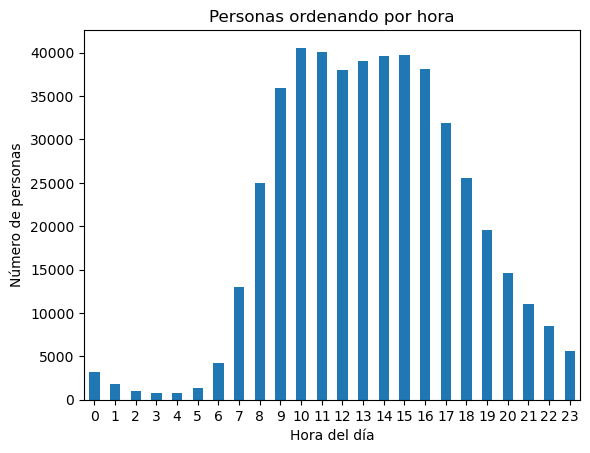

In [37]:
# Se agrupan los datos por la columna 'order_hour_of_day' y se cuenta con la columna user_id
orders_by_hour= instacart_orders.groupby(by='order_hour_of_day')['user_id'].count()
orders_by_hour.plot(
kind='bar',
title='Personas ordenando por hora',
xlabel='Hora del día',
ylabel='Número de personas',
rot=0
)
plt.show()

Se puede observar que las horas con más gente es entre las 9 de la mañana y las 4 de la tarde. Se observa también que en las horas de noche no hay actividad en comparación de el día.

### ¿Qué día de la semana compran víveres las personas?

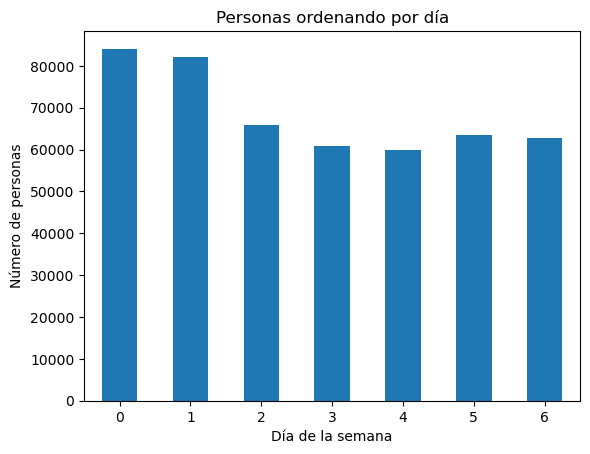

In [38]:
# Se agrupan por días de la semana y se cuentan las cantidades por usuario
orders_by_day= instacart_orders.groupby(by='order_dow')['user_id'].count() 
orders_by_day.plot(
kind='bar',
title='Personas ordenando por día',
xlabel='Día de la semana',
ylabel='Número de personas',
rot=0
)

plt.show()

Podemos observar que Lunes y Martes son los días con más interacciones en la semana. De Miércoles a Domingo podemos ver que se baja la actividad pero se mantiene algo igualada esos días, siendo el Viernes el día con menor actividad.

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

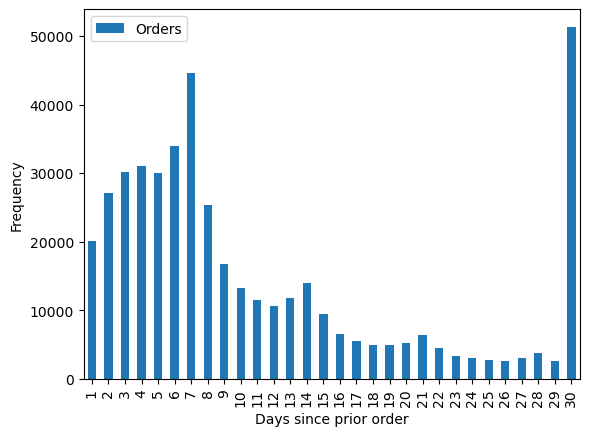

In [39]:
# Se sacan las filas que tengan días mayores a 0
days_til_new_order= instacart_orders.query('days_since_prior_order > 0')
days_til_new_order= days_til_new_order.groupby(by='days_since_prior_order')['order_id'].count().reset_index()
days_til_new_order['days_since_prior_order']=days_til_new_order['days_since_prior_order'].astype('int')
days_til_new_order.plot(
    x='days_since_prior_order',
    y='order_id',
    kind='bar',
    xlabel='Days since prior order',
    ylabel='Frequency'
)
plt.legend(['Orders'])
plt.show()

Se observa que la mayor parte de las personas esperan los 30 días para volver a hacer otro pedido. El area de la gráfica donde se ve que está la mayor cantidad de personas es de 1 a 8 días.

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

In [40]:
wed=instacart_orders.query('order_dow == 2') #se sacan las filas de las órdenes hechas en miércoles
wed=wed.groupby('order_hour_of_day')['order_id'].count() #se sacan las cantidades de pedido por hora
print(wed.head(10))

order_hour_of_day
0     462
1     240
2     136
3     104
4     109
5     196
6     653
7    1900
8    3485
9    5057
Name: order_id, dtype: int64


In [41]:
sat=instacart_orders.query('order_dow == 5')#se hace lo mismo que en el df pasado, en este caso para el día sábado 
sat=sat.groupby('order_hour_of_day')['order_id'].count() 
print(sat.head(10))

order_hour_of_day
0     459
1     219
2     123
3      99
4     118
5     229
6     654
7    1933
8    3373
9    4794
Name: order_id, dtype: int64


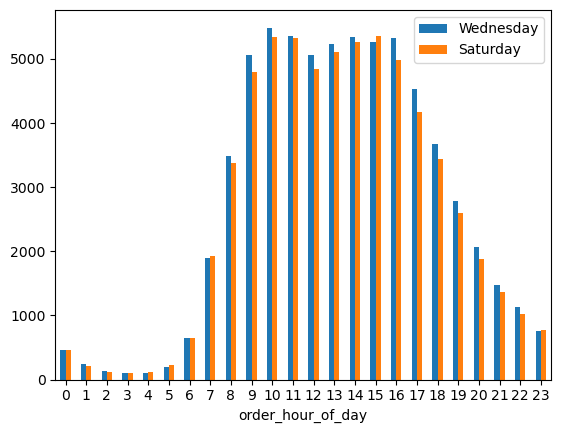

In [42]:
wed_and_sat= pd.concat([wed, sat],axis='columns') #se unen los dos df para tener los valores juntos y graficar cada columna
wed_and_sat.columns= ['wed_order_hour_of_day','sat_order_hour_of_day']
wed_and_sat.plot(
    kind='bar',
    rot=0
)
plt.legend(['Wednesday','Saturday'])
plt.show()

Se puede ver que los comportamientos son muy similares, aunque el Miércoles es el que normalmente está un poco por arriba en en la cantidad de pedidos.

### ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
# Se saca el número más alto de pedido, para saber cuántos ha hecho cada usuario
orders_by_client=instacart_orders.groupby(by='user_id').max().reset_index()

orders_by_user=orders_by_client[['user_id','order_number']] #se extraen estas dos columnas
print(orders_by_user)
print()
print('El valor más alto en los pedidos es',orders_by_user['order_number'].max(),'y el valor más bajo es', orders_by_user['order_number'].min()) #se saca el rango de los pedidos

        user_id  order_number
0             2             4
1             4             6
2             5             4
3             6             4
4             7            19
...         ...           ...
157432   206203             2
157433   206206            66
157434   206207            14
157435   206208            34
157436   206209            13

[157437 rows x 2 columns]

El valor más alto en los pedidos es 100 y el valor más bajo es 1


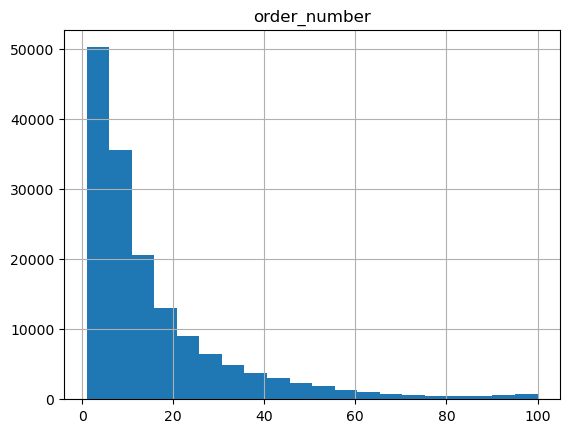

In [44]:
orders_by_user.hist(
    column='order_number',
    bins=20
)
plt.show()

La mayoría de los clientes realizan de 0 a 10 pedidos. De 10 a 40 todavía se ve una cantidad notable, y a partir de los 40 pedidos la cantidad de usuarios es muy baja.

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
# Se agrupan los productos por id, se sacan la cantidad de veces que hay y se ordenan los valores
top_products= order_products.groupby(by='product_id').count().reset_index().sort_values(by='order_id',ascending=False)

top_products.head(20)

,product_id,order_id,add_to_cart_order,reordered
22808,24852,66050,66050,66050
12025,13176,53297,53297,53297
19370,21137,37039,37039,37039
20077,21903,33971,33971,33971
43271,47209,29773,29773,29773
43788,47766,24689,24689,24689
43663,47626,21495,21495,21495
15364,16797,20018,20018,20018
24047,26209,19690,19690,19690
25556,27845,19600,19600,19600


In [46]:
# Se junta con el df de products para obtener los nombres de los productos, usando 'product_id' para unirlos
top_products_names=top_products.merge(products, on='product_id', how='left') 
top_products_names.head(20)

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,24852,66050,66050,66050,BANANA,24,4
1,13176,53297,53297,53297,BAG OF ORGANIC BANANAS,24,4
2,21137,37039,37039,37039,ORGANIC STRAWBERRIES,24,4
3,21903,33971,33971,33971,ORGANIC BABY SPINACH,123,4
4,47209,29773,29773,29773,ORGANIC HASS AVOCADO,24,4
5,47766,24689,24689,24689,ORGANIC AVOCADO,24,4
6,47626,21495,21495,21495,LARGE LEMON,24,4
7,16797,20018,20018,20018,STRAWBERRIES,24,4
8,26209,19690,19690,19690,LIMES,24,4
9,27845,19600,19600,19600,ORGANIC WHOLE MILK,84,16


In [47]:
top_products_names[['product_name','product_id']].head(20)

,product_name,product_id
0,BANANA,24852
1,BAG OF ORGANIC BANANAS,13176
2,ORGANIC STRAWBERRIES,21137
3,ORGANIC BABY SPINACH,21903
4,ORGANIC HASS AVOCADO,47209
5,ORGANIC AVOCADO,47766
6,LARGE LEMON,47626
7,STRAWBERRIES,16797
8,LIMES,26209
9,ORGANIC WHOLE MILK,27845


Observamos que el producto más vendido son los plátanos. Podemos observar una tendencia en la compra de productos orgánicos, ya que la mayoría de los más vendidos son de este tipo.

### ¿Cuántos artículos compran normalmente las personas en un pedido? 

In [48]:
# Se agrupa por órdenes y se saca el máximo para obtener la cantidad más alta de artículos en un pedido
articles_in_one_order= order_products.groupby(by='order_id').max().reset_index() 
articles_in_one_order.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,4,46842,13,1
1,9,47890,15,1
2,11,31506,5,1
3,19,42265,3,1
4,20,47485,8,0
5,31,49156,10,1
6,48,42169,8,1
7,56,47209,10,1
8,61,42265,12,1
9,68,43739,9,1


In [49]:
# Se descartan los valores que cambiamos a 999, ya que podría dar información errónea en la gráfica
articles_in_one_order=articles_in_one_order.query('add_to_cart_order < 999')['add_to_cart_order'] 
print(articles_in_one_order)
print()

#Se corrobora la corrección
print(articles_in_one_order.max())
print()
print(articles_in_one_order.min())

0         13
1         15
2          5
3          3
4          8
          ..
450041    17
450042     9
450043     5
450044     4
450045     1
Name: add_to_cart_order, Length: 449976, dtype: int32

64

1


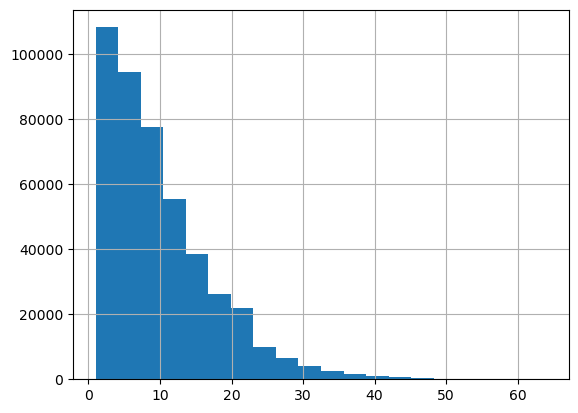

In [50]:
articles_in_one_order.hist(
    bins=20
)
plt.show()

Podemos observar que la mayoría de las personas se encuentra pidiendo entre 1 y 15 artículos por pedido. De 16 en adelante la cantidad de personas en menos significativa a comparación de la primera parte.

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia 

In [51]:
# Se sacan los artículos que se han pedido denuevo,se agrupan por producto y se cuentan  
top_prd_reord= order_products[order_products['reordered'] == 1].groupby(by='product_id').count() 
top_prd_reord

,order_id,add_to_cart_order,reordered
product_id,,,
1,158,158,158
3,31,31,31
4,25,25,25
7,1,1,1
8,6,6,6
...,...,...,...
49690,4,4,4
49691,31,31,31
49692,5,5,5


In [52]:
# Se unen los df para obtener los nombres de los productos
top_prd_reord= top_prd_reord.merge(products, on='product_id', how='left') 
top_prd_reord

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,158,158,158,CHOCOLATE SANDWICH COOKIES,61,19
1,3,31,31,31,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
2,4,25,25,25,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
3,7,1,1,1,PURE COCONUT WATER WITH ORANGE,98,7
4,8,6,6,6,CUT RUSSET POTATOES STEAM N' MASH,116,1
...,...,...,...,...,...,...,...
36223,49690,4,4,4,HIGH PERFORMANCE ENERGY DRINK,64,7
36224,49691,31,31,31,ORIGINAL PANCAKE & WAFFLE MIX,130,14
36225,49692,5,5,5,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
36226,49693,11,11,11,SPRING WATER BODY WASH,127,11


In [53]:
# Se ordenan los valores
top_prd_reord=top_prd_reord.sort_values(by='order_id',ascending=False) 
top_prd_reord

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
18104,24852,55763,55763,55763,BANANA,24,4
9528,13176,44450,44450,44450,BAG OF ORGANIC BANANAS,24,4
15368,21137,28639,28639,28639,ORGANIC STRAWBERRIES,24,4
15936,21903,26233,26233,26233,ORGANIC BABY SPINACH,123,4
34407,47209,23629,23629,23629,ORGANIC HASS AVOCADO,24,4
...,...,...,...,...,...,...,...
5120,7092,1,1,1,MELATONIN NUTRASPRAY SUBLINGUAL ORANGE FLAVOR,6,2
15278,21003,1,1,1,WHITE CHOCOLATE MACADAMIA COFFEE CREAMER,53,16
23932,32856,1,1,1,CRAB RANGOON,129,1
31131,42727,1,1,1,CHOCOLATE LOVERS CHIPS DELUXE COOKIES,61,19


In [54]:
top_prd_reord[['product_id','product_name']].reset_index(drop='bool').head(20)

,product_id,product_name
0,24852,BANANA
1,13176,BAG OF ORGANIC BANANAS
2,21137,ORGANIC STRAWBERRIES
3,21903,ORGANIC BABY SPINACH
4,47209,ORGANIC HASS AVOCADO
5,47766,ORGANIC AVOCADO
6,27845,ORGANIC WHOLE MILK
7,47626,LARGE LEMON
8,27966,ORGANIC RASPBERRIES
9,16797,STRAWBERRIES


Podemos observar que los productos son similares a la lista de los productos más populares, con algunas pequeñas diferencias en las posiciones, sin embargo, vemos los mismos productos.

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
# Se sacan los productos que se hayan pedido por primera vez
prod_ordrd= order_products[order_products['reordered'] == 0].groupby(by='product_id').count().sort_values(by='order_id',ascending= False).reset_index()
prod_ordrd= prod_ordrd[['product_id','reordered']]
prod_ordrd.columns=['product_id','ordered']
prod_ordrd

,product_id,ordered
0,24852,10287
1,13176,8847
2,21137,8400
3,21903,7738
4,47626,6451
...,...,...
43759,28478,1
43760,23771,1
43761,13638,1
43762,21402,1


In [56]:
# Se sacan los productos que se hayan pedido más de una vez
prod_reordrd= order_products[order_products['reordered'] == 1].groupby(by='product_id').count().sort_values(by='order_id',ascending= False).reset_index()
prod_reordrd= prod_reordrd[['product_id','reordered']] 
prod_reordrd

,product_id,reordered
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,7092,1
36224,21003,1
36225,32856,1
36226,42727,1


In [57]:
# Se unen los dos df 
reorder_proportion= prod_ordrd.merge(prod_reordrd,on='product_id') 

# Se hace la operación para la relación
reorder_proportion['proportion']=reorder_proportion['reordered']/reorder_proportion['ordered'] 

# Se junta con el df products para obtener el nombre del producto
reorder_proportion= reorder_proportion.merge(products, on='product_id') 
reorder_proportion[['product_id','product_name','proportion']].head(20)

,product_id,product_name,proportion
0,24852,BANANA,5.420725
1,13176,BAG OF ORGANIC BANANAS,5.024302
2,21137,ORGANIC STRAWBERRIES,3.409405
3,21903,ORGANIC BABY SPINACH,3.390152
4,47626,LARGE LEMON,2.332042
5,26209,LIMES,2.094452
6,47209,ORGANIC HASS AVOCADO,3.845866
7,16797,STRAWBERRIES,2.296229
8,47766,ORGANIC AVOCADO,3.152203
9,39275,ORGANIC BLUEBERRIES,1.732087


Los primeros dos productos tienen una proporción alta de recompra siendo los plátanos, después el resto del top 20 de artículos más vendidos está entre 2 a 3 veces su proporción de compra/recompra.


### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [58]:
# Se juntan los df para juntar los datos necesarios
user_order= instacart_orders.merge(order_products, on='order_id') 

# Se obtienen los datos de los objetos pedidos 
user_total_products= user_order.groupby('user_id')['reordered'].count().reset_index() 
user_reorder= user_order[user_order['reordered']==1].groupby('user_id')['reordered'].count().reset_index()

# Se agrupan los datos y se sacan la cantidad de veces que han sido pedidos
print(user_total_products)
print(user_reorder)

        user_id  reordered
0             2         26
1             4          2
2             5         12
3             6          4
4             7         14
...         ...        ...
149621   206203         27
149622   206206         21
149623   206207         46
149624   206208        125
149625   206209         25

[149626 rows x 2 columns]
        user_id  reordered
0             2          1
1             5          8
2             7         13
3            11          3
4            12          3
...         ...        ...
132986   206203          6
132987   206206         15
132988   206207         41
132989   206208         87
132990   206209          8

[132991 rows x 2 columns]


In [59]:
# Se sacan las columnas deseadas
user_total_products= user_total_products[['user_id','reordered']] 

# Se cambia el nombre de una columna para mejor entendimiento
user_total_products.columns=['user_id','ordered'] 
user_reorder= user_reorder[['user_id','reordered']]

# Se unen los df
user_prdct_proportion= user_total_products.merge(user_reorder, on='user_id') 

# Se saca la proporción
user_prdct_proportion['proportion']= user_prdct_proportion['reordered'] / user_prdct_proportion['ordered'] 
user_prdct_proportion.sort_values(by='proportion')

,user_id,ordered,reordered,proportion
68493,106148,67,1,0.014925
130092,201663,66,1,0.015152
100199,155522,58,1,0.017241
37089,57630,57,1,0.017544
4778,7349,55,1,0.018182
...,...,...,...,...
75056,116344,3,3,1.000000
118491,183769,3,3,1.000000
75050,116337,1,1,1.000000
2906,4473,2,2,1.000000


Hay mucha varianza entre cada una de los proporciones de los clientes.

### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [60]:
# Se sacan los productos colocados de inicio en el carro y se ordenan
top_first_prd= order_products[order_products['add_to_cart_order'] == 1].groupby('product_id').count().sort_values(by='order_id',ascending=False).reset_index() 

# Se sacan las columnas con las cuales se trabajará
top_first_prd= top_first_prd[['product_id','order_id']] 

# Se cambia nombre de la columna para mejor comprensión
top_first_prd.columns=['product_id','orders'] 
top_first_prd

,product_id,orders
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
...,...,...
26755,10981,1
26756,10985,1
26757,38272,1
26758,10989,1


In [61]:
# Se juntan df para obtener nombres de productos
top_first_prd_names= top_first_prd.merge(products,on='product_id') 
top_first_prd_names

,product_id,orders,product_name,aisle_id,department_id
0,24852,15562,BANANA,24,4
1,13176,11026,BAG OF ORGANIC BANANAS,24,4
2,27845,4363,ORGANIC WHOLE MILK,84,16
3,21137,3946,ORGANIC STRAWBERRIES,24,4
4,47209,3390,ORGANIC HASS AVOCADO,24,4
...,...,...,...,...,...
26755,10981,1,CLOUD WHITE DECORATING CUPCAKE ICING,97,13
26756,10985,1,PREMIUM TWIN PACK ROCK CORNISH GAME HEN,49,12
26757,38272,1,ORGANIC RAW COCONUT FLOUR,17,13
26758,10989,1,GARBAGE DISPOSAL FRESHENER & CLEANER RED PEAR ...,114,17


In [62]:
top_first_prd_names[['product_id','product_name','orders']].head(20)

,product_id,product_name,orders
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


Seguimos viendo la tendencia de el plátano como el producto número 1 en ventas, ahora como el primer producto colocado en el carrito, seguimos viendo una mayoría de productos orgánicos en la lista, pero menos que en la lista de más vendidos.

### Conclusion general del proyecto:

Hay una clara observación, que los alimentos orgánicos predominan los artículos con mayores ventas. La cantidad de 
productos que suelen hacer los clientes por pedido no es tan elevada, compran a volumen bajo. Se pueden observar que los 
días con mayor actividad siempre suelen ser en el inicio de semana, pasando por el punto más bajo jueves y viernes. Hay un 
punto de oportunidad en el enfocarse en ese repunte de clientes en el que se muestra que esperan casi 30 días para volver
a realizar un pedido. A pesar de que en los días de la semana pueda haber una diferencia en ventas, es relacional la cantidad
de ventas cada hora a lo largo de la semana.